In [1]:
import preamble
from apps.net.util import s3
import examples.dataset as dataset_tool

bucket = "perfd";
objs = s3.list_objects(bucket, key="")

In [2]:
app = "sparkperf-pagerank"
app_objs = [o for o in objs if app in o]
app_dfs = {ao: s3.download_object_as(bucket, ao) for ao in app_objs}

In [3]:
print(app_dfs.keys())

dict_keys(['sparkperf-pagerank/microps-spark-pagerank-dataset-size-5ne-after-1.pickle', 'sparkperf-pagerank/microps-spark-pagerank-dataset-size-5ne.pickle', 'sparkperf-pagerank/microps-spark-pagerank-instance-type-5ne-after-1.pickle', 'sparkperf-pagerank/microps-spark-pagerank-instance-type-5ne.pickle', 'sparkperf-pagerank/microps-spark-pagerank-scale-out-baseline-spkmod-ready-commit.pickle', 'sparkperf-pagerank/microps-spark-pagerank-scale-out.pickle'])


In [4]:
df = app_dfs["sparkperf-pagerank/microps-spark-pagerank-dataset-size-5ne-after-1.pickle"]

In [5]:
df = df[["dataset_size", "jct"]]

In [6]:
print(df)

    dataset_size    jct
0         160000  12808
1         280000  18700
2          40000   7329
3         360000  23191
4         280000  21695
..           ...    ...
94        240000  16772
95        280000  18833
96        200000  17796
97          4000   4727
98        160000  12866

[99 rows x 2 columns]


In [7]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = "spark-pagerank"
ctx["app_name"] = "spark-pagerank"
ctx["feature"] = ctx["feature_mode"] = ["dataset_size"]
ctx["target_feature"] = "jct"
ctx["testset_ratio"] = 0.33
ctx["retune"] = False

hyper-tuning hit: 0.33-dataset_size-jct-linear_regression-linear_regression-spark-pagerank-spark-pagerank
hyper-tuning hit: 0.33-dataset_size-jct-nearest_neighbors-nearest_neighbors-spark-pagerank-spark-pagerank
hyper-tuning hit: 0.33-dataset_size-jct-random_forest-random_forest-spark-pagerank-spark-pagerank
hyper-tuning hit: 0.33-dataset_size-jct-spark-pagerank-spark-pagerank-svm-svm
hyper-tuning hit: 0.33-dataset_size-jct-spark-pagerank-spark-pagerank-svm_kernelized-svm_kernelized
hyper-tuning hit: 0.33-dataset_size-jct-neural_network-neural_network-spark-pagerank-spark-pagerank
adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+----------------+-----+-----+------+-----+-------+-----+------+--------+-------+
|     False      |  lr | knn |  rf  | svm | svm_k |  nn | best | oracle | naive |
+----------------+-----+-----+------+-----+-------+-----+------+--------+-------+
| spark-pagerank | 7.6 | 3.9 | 18.2 | 6.2 |  5.8  | 3.6 | 3.6  |  3.1   |  73.0 |
+----------------+-

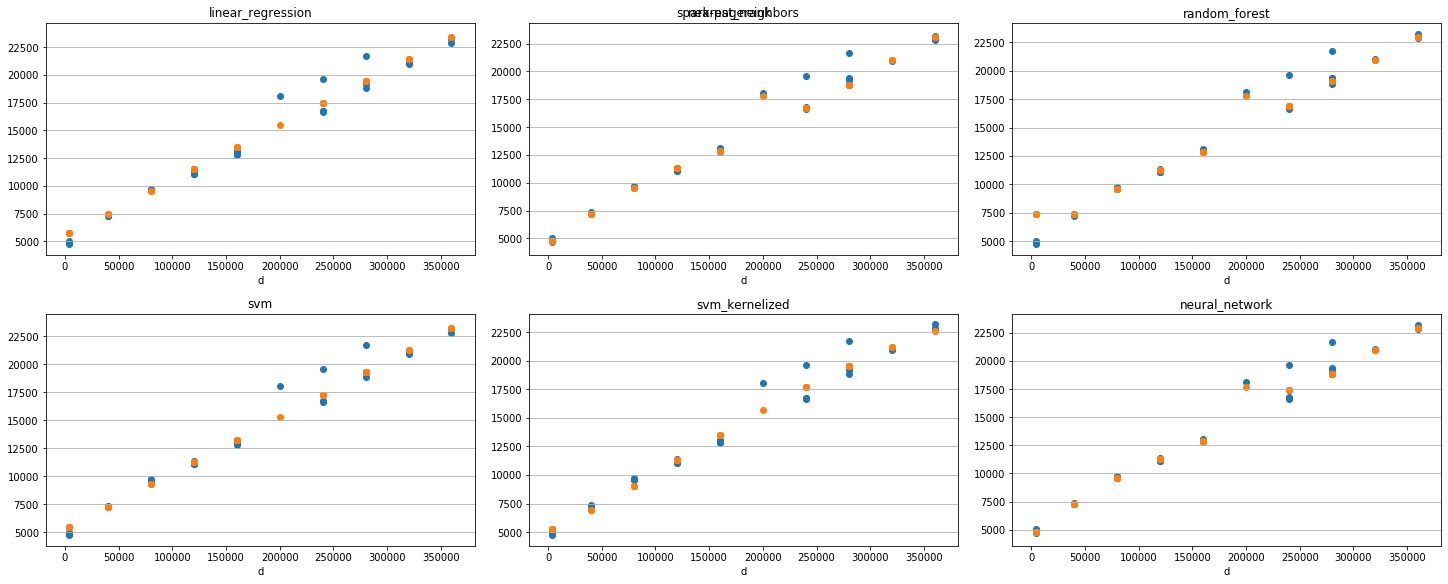

In [8]:
results = dataset_tool.best_case_eval(ctx, {"spark-pagerank": df})

In [9]:
from examples.ml_util.whatif_util import random_split, leave_pos_out
prob_seq = [0.05, 0.10, 0.25, 0.5]

results = dataset_tool.generic_eval_func(ctx, {"spark-pagerank": df}, split_func = random_split, percentage = prob_seq[0])

0.05 0


AssertionError: too few samples 0